In [16]:
#conda env: monocle
library(cmapR)
library(ggplot2)
library(data.table)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
#parse the gct file using cmapR
data = parse.gctx("PAAD.gct")

parsing as GCT v1.3
PAAD.gct 18465 rows, 183 cols, 0 row descriptors, 124 col descriptors


In [3]:
#head(data@mat)
expression_matrix = as.data.frame(data@mat)
head(expression_matrix)


,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A1CF,4.70,5.7,3.0,5.1,4.40,4.2,1.6,6.8,6.00,NaN,...,5.40,6.40,6.5,4.40,3.3,3.60,6.2,1.20,4.9,2.00
A2BP1,-1.00,1.1,NaN,NaN,0.10,NaN,NaN,1.7,0.40,-1.50,...,3.50,1.30,-0.3,NaN,2.1,2.00,0.0,NaN,2.0,NaN
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,...,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70
A2ML1,6.40,NaN,10.8,4.1,9.30,9.8,6.2,3.8,2.30,10.10,...,0.10,3.40,3.7,-0.90,3.6,1.00,2.8,10.50,3.1,5.10


In [4]:
# remove genes which have NaN entries for any sample 
row_sums = rowSums(data@mat)
row_sums = as.data.frame(row_sums)
expression_matrix$sum=NA
expression_matrix$sum=row_sums$row_sums
print(length(rownames(expression_matrix)))
em = subset(expression_matrix,sum!="NaN")
print (length(rownames(em)))

em$sum=NULL


[1] 18465
[1] 14098


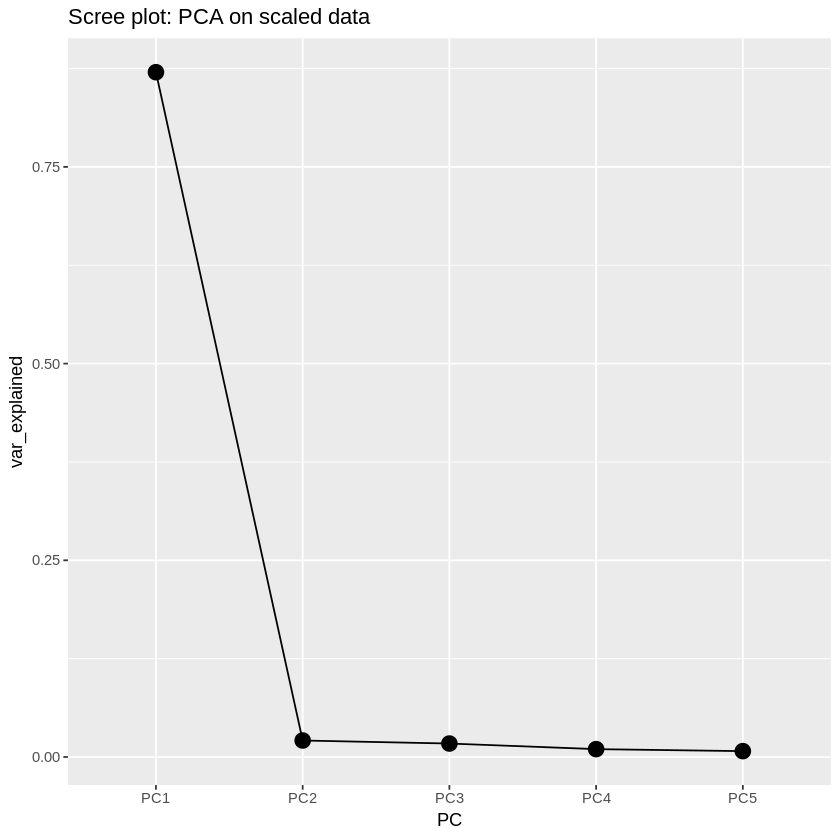

In [17]:
# Compute PCs and check the variance for the first 5 
prin_comp = prcomp(em,scale.=T)
var_explained_df <- data.frame(PC= paste0("PC",1:183),var_explained=(prin_comp$sdev)^2/sum((prin_comp$sdev)^2))
var_explained_df = var_explained_df[1:5,]
var_explained_df %>%
  ggplot(aes(x=PC,y=var_explained, group=1))+
  geom_point(size=4)+
  geom_line()+
  labs(title="Scree plot: PCA on scaled data")

In [5]:
#seperate the top 2 PCs in a dataframe
df_pc_top2 = as.data.frame(prin_comp$rotation[,1:2])
df_pc_top2$class = NULL
df_pc_top2$class_other = NULL
df_pc_top2$class = as.data.frame(data@cdesc)$histological_type
df_pc_top2$class_other = as.data.frame(data@cdesc)$histological_type_other
df_pc_top2 = setDT(df_pc_top2,keep.rownames="samples")
head(df_pc_top2)

samples,PC1,PC2,class,class_other
aab1-Primary solid Tumor,0.07644532,0.04588233,pancreas-adenocarcinoma-other subtype,invasive adenocarcinoma
aab4-Primary solid Tumor,0.07644781,0.02799422,pancreas-adenocarcinoma-other subtype,"invasive, well-differentiated"
aab6-Primary solid Tumor,0.07411721,0.03328779,pancreas-adenocarcinoma ductal type,NA
aab8-Primary solid Tumor,0.07597217,0.03739902,pancreas-adenocarcinoma ductal type,NA
aab9-Primary solid Tumor,0.07729168,-0.02106252,pancreas-adenocarcinoma ductal type,NA
aaba-Primary solid Tumor,0.07570598,0.01134471,pancreas-adenocarcinoma ductal type,NA


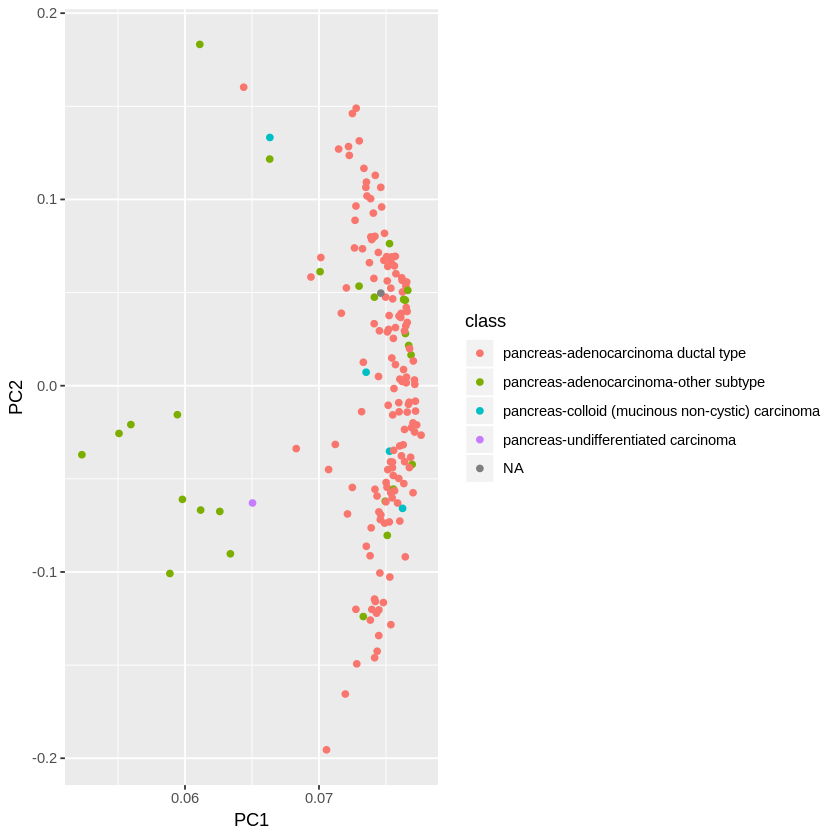

In [6]:
ggplot(df_pc_top2, aes(x=PC1, y=PC2, color=class)) + geom_point()
#scatter plot for histological type 


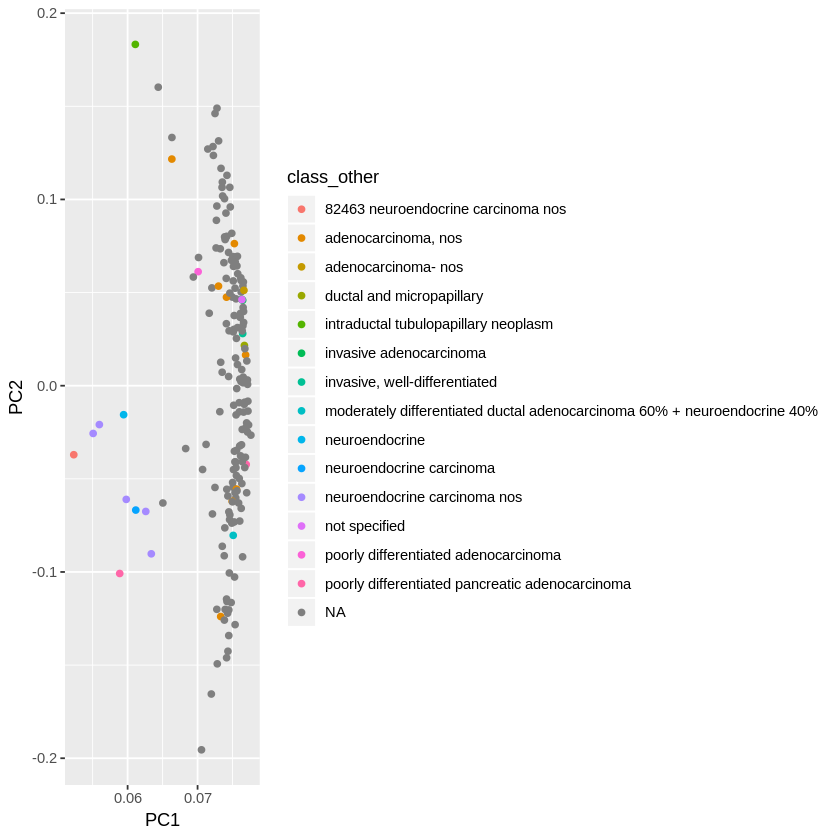

In [7]:
ggplot(df_pc_top2, aes(x=PC1, y=PC2, color=class_other)) + geom_point()
#scatter plot based on other histological type 

In [8]:
# removing the neuroendocrine tumours and the outliers 
ac_data = subset(df_pc_top2,PC2>-0.15 & PC2<0.15 & PC1>0.065)
ac_samples = as.vector(ac_data$samples)
ac_exp_data = as.data.frame(em[,ac_samples])
# check if the above snippet has worked 
print (length(colnames(em)))
print (length(colnames(ac_exp_data)))
write.table(ac_exp_data,"ac_exp_data.txt",sep="\t",row.names=T,col.names=T,quote=F)

[1] 183
[1] 170
